In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split


In [3]:
faces = fetch_olivetti_faces()   # 400 faces, 64x64 each
X = faces.data                   # shape (400, 4096) — each row is a flattened image
images = faces.images            # shape (400, 64, 64) — for plotting
y = faces.target                 # labels (person id) — optional
print(X.shape)  # -> (400, 4096)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\ELCOT\scikit_learn_data
(400, 4096)


In [4]:
mean_face = np.mean(X, axis=0)        # shape (4096,)
X_centered = X - mean_face            # same shape (400, 4096)


In [13]:
# 3️⃣ Step 3: Compute covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

In [14]:
# 4️⃣ Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [15]:
# Sort by descending eigenvalues (most important first)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [16]:
# 5️⃣ Step 5: Select top k eigenvectors (the "Eigenfaces")
k = 9
top_eigenfaces = eigenvectors[:, :k]

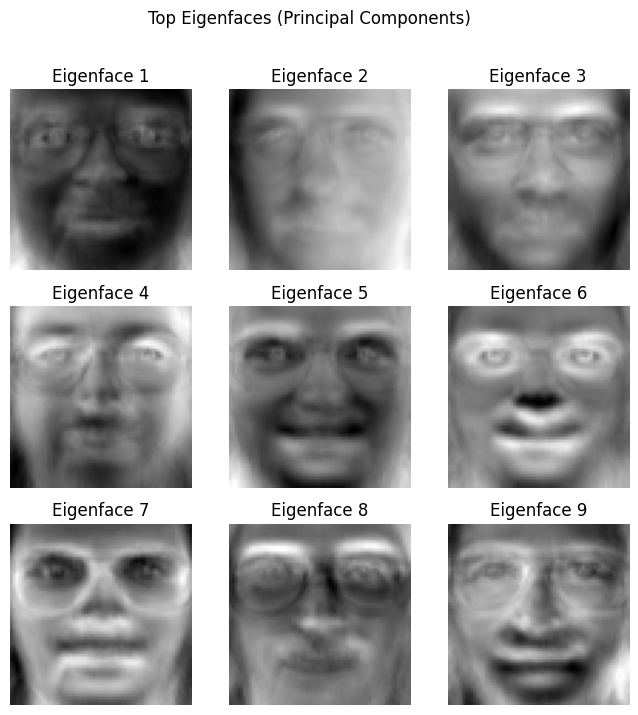

In [17]:
# 6️⃣ Step 6: Visualize top Eigenfaces
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    eigenface = top_eigenfaces[:, i].reshape(64, 64)
    ax.imshow(eigenface, cmap="gray")
    ax.set_title(f"Eigenface {i+1}")
    ax.axis("off")

plt.suptitle("Top Eigenfaces (Principal Components)")
plt.show()

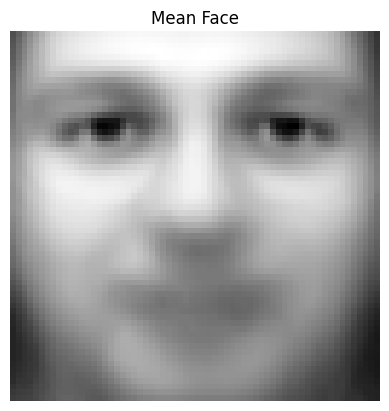

In [18]:
# 7️⃣ Step 7: Visualize Mean Face
plt.imshow(mean_face.reshape(64, 64), cmap="gray")
plt.title("Mean Face")
plt.axis("off")
plt.show()